<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [22]:
print (boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels
Generate the following and explain your finding1:
•	For the "Median value of owner-occupied homes" provide a boxp2ot
•	Provide a bar plot for the Charles river vari3ble
•	Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and o4der)
•	Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relatio5ship?
•	Create a histogram for the pupil to teacher ratio ariable


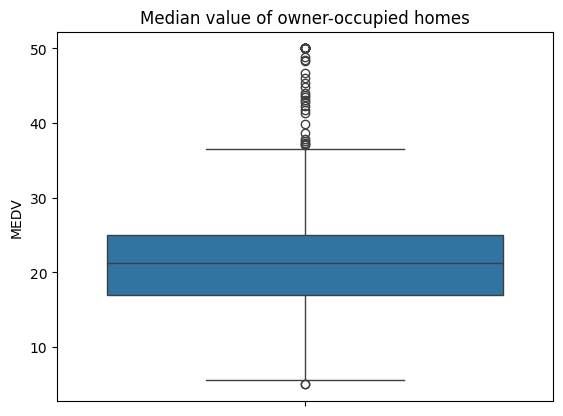

In [14]:
#1	For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y="MEDV", data=boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

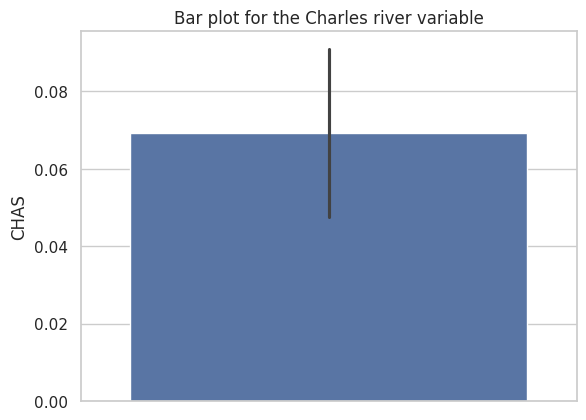

In [16]:
#2	Provide a bar plot for the Charles river variable

sns.set(style="whitegrid")
ax = sns.barplot( y="CHAS", data=boston_df)
pyplot.title('Bar plot for the Charles river variable')
pyplot.show()

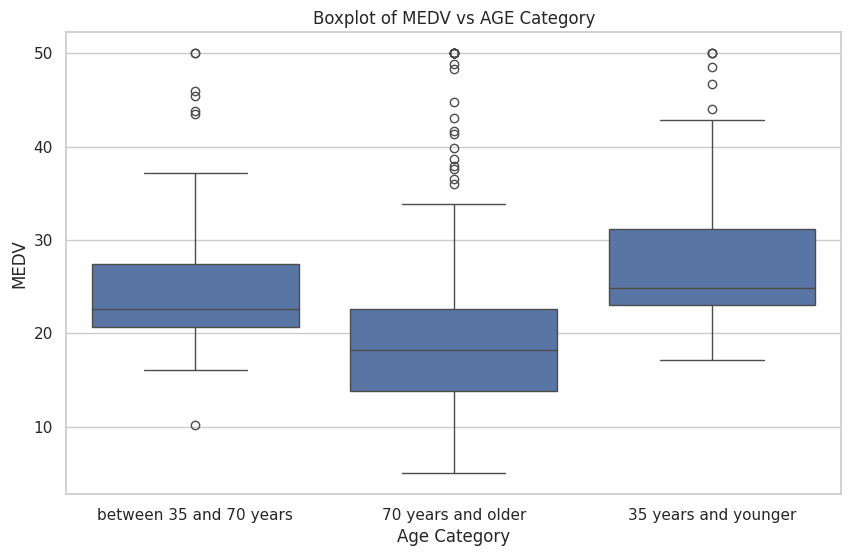

In [19]:
# 3	Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Define the age groups
def categorize_age(age):
    if age <= 35:
        return '35 years and younger'
    elif age > 35 and age <= 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

# Apply the categorization to the AGE column
boston_df['AGE_Category'] = boston_df['AGE'].apply(categorize_age)

# Create the boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Category', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Category')
pyplot.xlabel('Age Category')
pyplot.ylabel('MEDV')
pyplot.show()

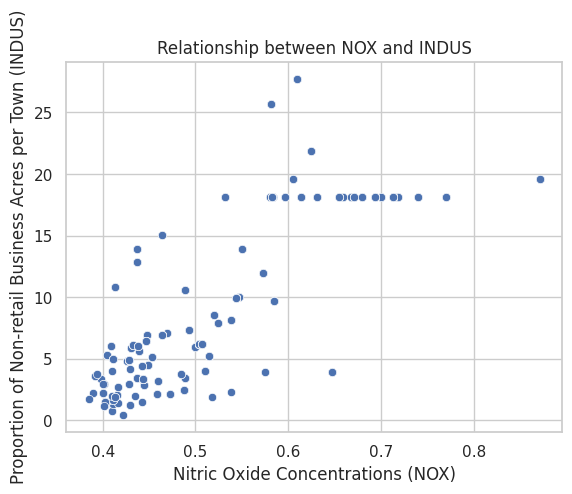

In [24]:
#4	Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Relationship between NOX and INDUS')
pyplot.xlabel('Nitric Oxide Concentrations (NOX)')
pyplot.ylabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.grid(True)
pyplot.show()

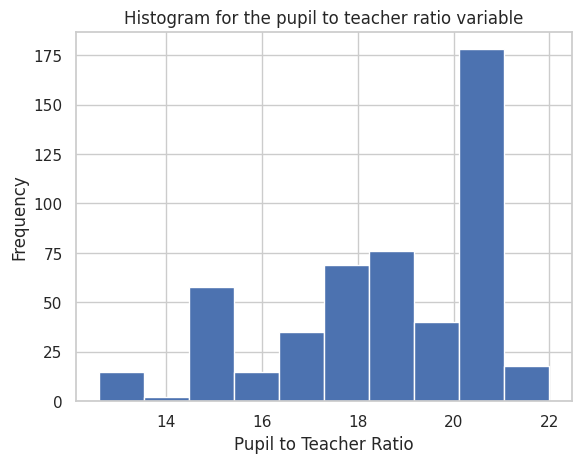

In [29]:
#5	Create a histogram for the pupil to teacher ratio variable

pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Histogram for the pupil to teacher ratio variable')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()

Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;6
•	Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples7
•	Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOV8)
•	Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlati9n)
•	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression anal
ysis)
Be sure to:
1.	State your hypothesis.
2.	Use α = 0.05
3.	Perform the test Statistics.
4.	State the conclusion from the test.


6.	Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   $H\_0: µ\_1 = µ\_2$ ("there is no a significant difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses bounded by the Charles river")

In [44]:
from scipy.stats import ttest_ind

houses_bounded_by_charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
houses_not_bounded_by_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_statistic, p_value = ttest_ind(houses_bounded_by_charles, houses_not_bounded_by_charles)

# Print the results
print('T-test results:')
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-test results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


P-value is smaller than 0.05, hence we reject the null hypothesis. We can conclude that there is a significant difference in the median values of houses bounded by the Charles River compared to those not bounded by the river.

7) Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

40 years and younger
between 40 and 57 years
57 years and oder


In [47]:
boston_df.loc[(boston_df['AGE'] <= 40), 'age_group'] = '40 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 57), 'age_group'] = 'between 40 and 57 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'age_group'] = '57 years and older'

Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [49]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '40 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 40 and 57 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '57 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.907937021568495, pvalue=0.05550655447537772)

In [50]:
forty_lower = boston_df[boston_df['age_group'] == '40 years and younger']['MEDV']
forty_fiftyseven = boston_df[boston_df['age_group'] == 'between 40 and 57 years']['MEDV']
fiftyseven_older = boston_df[boston_df['age_group'] == '57 years and older']['MEDV']

In [51]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 28.614101859178227, P-Value: 1.7004292934854466e-12


Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

8) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

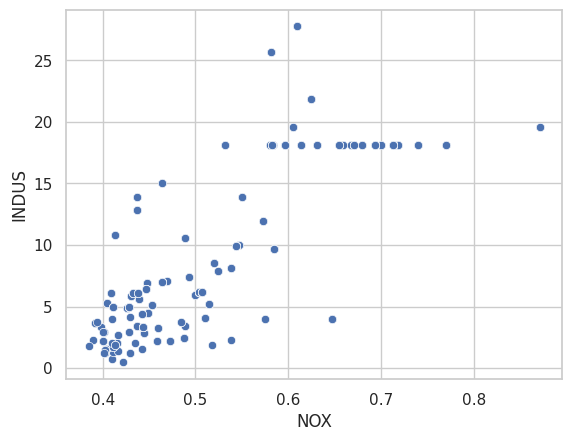

In [54]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

9) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [60]:
import statsmodels.api as sm

X = boston_df['DIS']  # Weighted distance to the five Boston employment centres
y = boston_df['MEDV']  # Median value of owner-occupied homes

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        18:29:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0